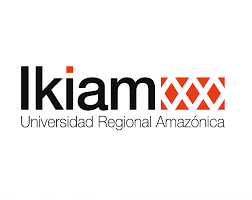

# EXAMEN PARCIAL PYTHON
    
## GBI6-2021II: BIOINFORMÁTICA

**Benalcazar Mera, Andres Mateo**

**03-08-2022**

In [2]:
import pandas as pd

In [3]:
tabla = pd.DataFrame({"Modelo" : pd.Categorical(["DESKTOP-U73I4LB",
                                                 "Color dorado",
                                                 "Pantalla ful HD no tactil"]),
                      "Sistema" : pd.Categorical(["Procesador AMD A9-9420",
                                                  "memoria RAM 8 GB",
                                                  "Sistema operativo Windows 10 de 64 bits"])}, index=[1,2,3])
tabla

,Modelo,Sistema
1,DESKTOP-U73I4LB,Procesador AMD A9-9420
2,Color dorado,memoria RAM 8 GB
3,Pantalla ful HD no tactil,Sistema operativo Windows 10 de 64 bits


# Ejercicio 1 [2 puntos]
## Cree el archivo miningscience.py con las siguientes dos funciones:

i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el keyword.

ii. ```science_plots```: la función debe

utilizar como argumento de entrada la data descargada por download_pubmed
ordenar los conteos de autores por país en orden ascedente y
seleccionar los cinco más abundantes. Con esta selección debe graficar un pie_plot. Como guía para el conteo por países puede usar el ejemplo de MapOfScience.
iii Cree un docstring para cada función.

Luego de crear las funciones, cargue el módulo miningscience como msc e imprima docstring de cada función.

In [91]:
import Bio
from Bio.Seq import Seq
from Bio import Entrez
import re

#obtencion de datos (documentos relacionados con la palabra ) 10**5
def download_pubmed(keyword):
    """"La funcion download_pubmed se encarga de rescatar la id de los documentos que esten relacionados con la keyword que se envio en la base de datos de pubmed """
    Entrez.email = "andres.benalcazar@est.ikiam.edu.ec"
handle = Entrez.esearch(db="pubmed", 
                        term="keyword]",
                        usehistory="y")
record = Entrez.read(handle)
id_list = record["IdList"]
record["Count"]
results1 = record



def science_plots(tipo):
    """"La función de science_plots se encarga de filtrar la data dependiendo de la variable (tipo) que se envió pudiendo ser esta DP AU o AD , los datos  PMID para la extracción de documentos se obtienen gracias a la función download_pubmed que busca los documentos exactos basados en su ID   """
    #--------------------------Uso del metodo download_pubmed---------------------------------------
    results = download_pubmed('Bacullus cereus') #Se usa el metodo download_pubmed para obtener los documentos con una keyword  
    #-----------------------------------------------------------------------------------------------
    
    id_list = results['IdList']                                                  #separamos ids    
    ids = ','.join(id_list)    
    Entrez.email = 'andres.benalcazar@est.ikiam.edu.ec'
    handle = Entrez.efetch(db='pubmed',rettype='medline',retmode='text',id=ids)  #rescatamos ducumentos por id
    all_data = handle.read()                                                     #se lee la data
    
    if(tipo == "DP"):#PMID y DP_year 
        zipcodes = re.findall(r'PMID-.(.+)', all_data)
        zipcodes1 = re.findall(r'DP  -.(.+)', all_data)
        all_ = list(zip(zipcodes,zipcodes1))
        nom_colum = ['PMID','DP_year']
    else:
            
        if(tipo == "AD"):#country y el num_auth
            zipcodes = re.findall(r'PL  -.(.+)|(AU)  -|', all_data)
            nom_colum = ['country','num_auth']
        mira = list()
        for x in zipcodes:
            if(x[0]!=''):
                mira.append((x[0],''))
            elif(x[1]!=''):
                mira.append(('',x[1]))
        zipcodes= mira       
        lista_1 = list()
        lista_2 = list()
        va_c = 0
        for y in zipcodes:
            if(y[0] !=''):
                x_0 = y[0]
                lista_1.append(y[0])
                if(va_c != 0):
                    lista_2.append(va_c)
                    va_c = 0
            else:
                va_c = va_c+1            
        all_ = list(zip(lista_1,lista_2))
        
    results = pd.DataFrame(all_,columns = nom_colum)             

#seccion de ejecicion de codigo y envio de variables
#id_list = results['IdList']          #separamos ids 
if __name__ == '__main__':
 #--------------------------Se ingresa la varaible tipo para iniciar---------------------------------------
    #resultado_final = mining_pubs("AU")  #Enviamos el tipo para el procesamiento ER (DP AU AD)  
#---------------------------------------------------------------------------------------------------------
    print("El nombre de la la funcion es:",download_pubmed.__name__ )
    print("Documentacion de la funcion :",download_pubmed.__doc__)
    print("__________________________________")
    print("El nombre de la la funcion es:",science_plots.__name__ )
    print("Documentacion de la funcion :",science_plots.__doc__)

El nombre de la la funcion es: download_pubmed
Documentacion de la funcion : "La funcion download_pubmed se encarga de rescatar la id de los documentos que esten relacionados con la keyword que se envio en la base de datos de pubmed 
__________________________________
El nombre de la la funcion es: science_plots
Documentacion de la funcion : "La función de science_plots se encarga de filtrar la data dependiendo de la variable (tipo) que se envió pudiendo ser esta DP AU o AD , los datos  PMID para la extracción de documentos se obtienen gracias a la función download_pubmed que busca los documentos exactos basados en su ID   


# Ejercicio 2 [2 puntos]
## Utilice dos veces la función ```download_pubmed``` para:

Descargar la data, utilizando los ```keyword``` de su preferencia.
Guardar el archivo descargado en la carpeta ```data```.
Para cada corrida, imprima lo siguiente:

'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX

In [89]:
# Escriba aquí su código para el ejercicio 2
pythonpt1 = download_pubmed ("Bacillus cereus")
f1 = (download_pubmed ("Bacillus cereus"))
print ("El número articulos para Bacillus cereus es: ", len(pythonpt1))
print ("El número articulos para Bacillus cereus es: ", len(f1))

#print (download_pubmed ("Bacillus cereus"))

TypeError: object of type 'NoneType' has no len()

# Ejercicio 3 [1.5 puntos]
## Utilice dos veces la función science_plots para:

Visualizar un pie_plot para cada data descargada en el ejercicio 2.

Guardar los pie_plot en la carpeta **img**

In [90]:
science_plots("Bacillus cereus")

science_plots("Bacillus")

TypeError: 'NoneType' object is not subscriptable

## Ejercicio 4 [1 punto]

**Interprete** los resultados de las figuras del **ejercicio 3**

## Ejercicio 5 [2 puntos]

Para algún **gen de las enzimas que intervienen en la ruta metabolica de la gluconeogenesis** ([Lista de genes por tipología](https://www.genome.jp/pathway/map00010+C00068)), realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda y guarde en la carpeta ```data```.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de las secuencias de los **quince primeros** IDs de la accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Guarde su arbol filogénetico en la carpeta ```img```

5. Interprete el árbol del paso 4. 

In [94]:
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
# cargar biopython o sus módulo, funciones
from Bio import Entrez
import re
import os 
from Bio.Align.Applications import ClustalwCommandline

with open("sequence.seq") as f:
    data = f.readlines()[0:15]
out_sequence = open("secuencias.fasta", "w")
for linea in data:  
    Entrez.email="andres.benalcazar@est.ikiam.edu.ec"
    handle=Entrez.efetch(db="nucleotide" ,id=linea ,rettype="fasta", retmode="text")
    data=(handle.read())
    out_sequence.write(data)
out_sequence.close()

FileNotFoundError: [Errno 2] No such file or directory: 'sequence.seq'

In [95]:
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "secuencias.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
ClustalAlign = AlignIO.read("secuencias.aln", "clustal")
print(ClustalAlign)

AssertionError: Clustal_W executable is missing or not found

In [96]:
from Bio import Phylo
tree = Phylo.read("secuencias.dnd", "newick")

FileNotFoundError: [Errno 2] No such file or directory: 'secuencias.dnd'

In [ ]:
with open("secuencias.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
    
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
 
distance_matrix = calculator.get_distance(alignment)


from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
mic_tree = constructor.build_tree(alignment)
mic_tree.rooted = True
Phylo.write(mic_tree, "tree.xml", "phyloxml")

mic_tree = Phylo.read(file="tree.xml", format= "phyloxml")

# Arbol elemental en Matplotlib
import matplotlib
import matplotlib.pyplot as plt
#fig = Phylo.draw(cis_tree)

fig = plt.figure(figsize=(30, 40), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=30)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=20)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=20)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(mic_tree, axes=axes)
fig.savefig("img/mic_tree.jpg")